In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [53]:
NSIDE = 2
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 2 is 2.9e+01 deg


In [54]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX) #количесво клеток, на которые разбито небо

48


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


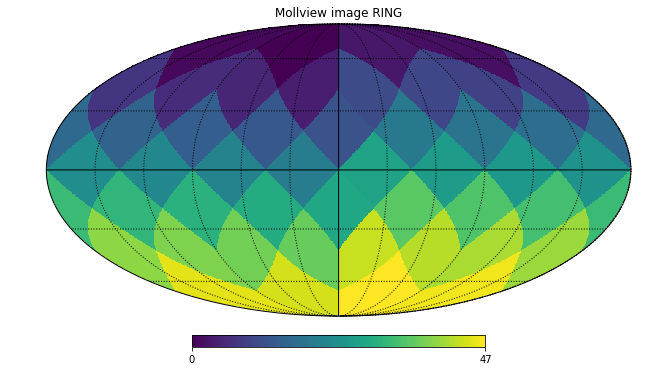

In [55]:
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

In [57]:
vec = hp.ang2vec(112, 41, lonlat=True)
print(vec)

[-0.28271918  0.69975454  0.65605903]


In [75]:
ipix_disc = hp.query_disc(nside=2, vec=vec, radius=np.radians(1))
ipix_disc

array([6])

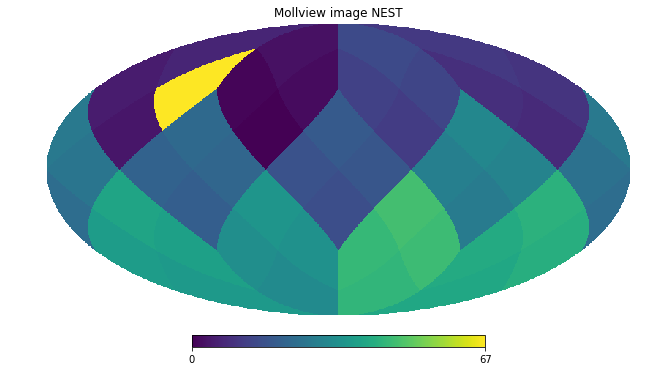

In [77]:
m = np.arange(NPIX)
m[ipix_disc] = m.max() + 20
hp.mollview(m, title="Mollview image NEST", nest=True)

In [65]:
theta, phi = np.degrees(hp.pix2ang(nside=NSIDE, ipix=[6]))

In [66]:
theta

array([48.1896851])

In [67]:
phi

array([112.5])

In [38]:
!healpy_get_wmap_maps.sh

--2020-04-06 14:30:24--  http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Resolving lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)... 129.164.179.68
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits [following]
--2020-04-06 14:30:25--  https://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits
Connecting to lambda.gsfc.nasa.gov (lambda.gsfc.nasa.gov)|129.164.179.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100676160 (96M)
Saving to: ‘wmap_band_iqumap_r9_7yr_W_v4.fits’

wmap_band_iqumap_r9 100%[===================>]  96,01M   407KB/s    in 3m 15s  

2020-04-06 14:33:40 (505 KB/s) - ‘wmap_band_iqumap_r9_7yr_W_v4.fits’ saved [100676160/100676160]

URL transformed to HTTPS due to an HST

In [39]:
wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits", nest=True)

/home/rt2122/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/rt2122/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


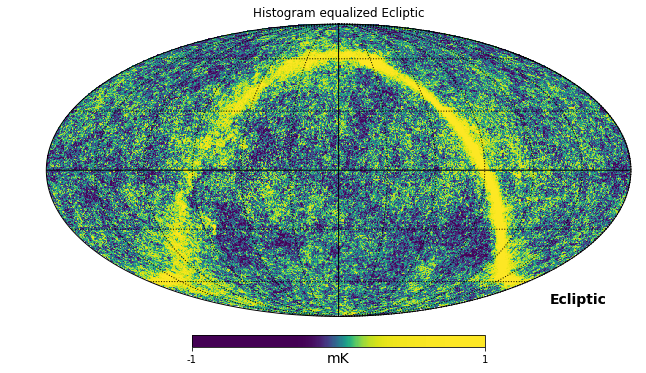

In [48]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1, 
    nest=True
)
hp.graticule()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


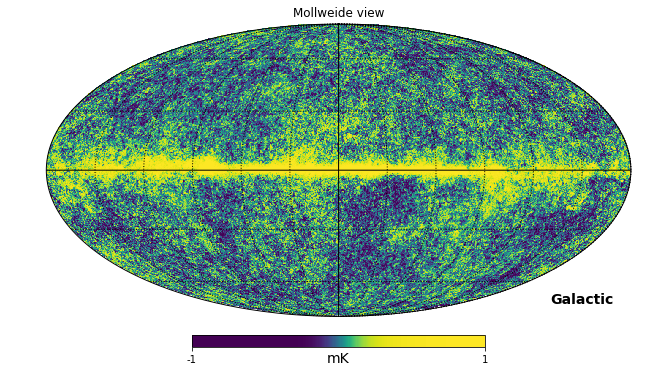

In [46]:
hp.mollview(
    wmap_map_I,
    coord=["G"],
    #title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1, nest=True
)
hp.graticule()